# Purpose

Analyze the basic info contained in the MIMIC dataset

In [1]:
from ppg2rr.rr_est import estimate_rr_dataset
from ppg2rr.evaluate import bland_altman, violin_comparison, scatter_compare
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
# Define a context manager to ignore warnings
class IgnoreWarnings:
    def __enter__(self):
        warnings.filterwarnings("ignore")
        return self

    def __exit__(self, exc_type, exc_value, traceback):
        warnings.filterwarnings("default")

In [3]:
%load_ext autoreload
%autoreload 2

# only display 2 decimals
pd.set_option('display.precision', 2)
sns.set_style("darkgrid")

# Load data

In [4]:
filename = 'mimic_peak count update - dynamic window size_20240109 160321_features.csv'
df = pd.read_csv(f"../data/results/{filename}")

/tmp/ipykernel_23101/2934906557.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"../data/results/{filename}")


In [6]:
# bin ppg quality
df['binned quality 25'] = pd.cut(df['quality - template matching-pct diagnostic quality pulses'], bins=25)
df['binned quality 10'] = pd.cut(df['quality - template matching-pct diagnostic quality pulses'], bins=10)
df.dropna(subset='RR ref (median)', inplace=True)

# HR and RR distributions

There are no "high RR" subjects

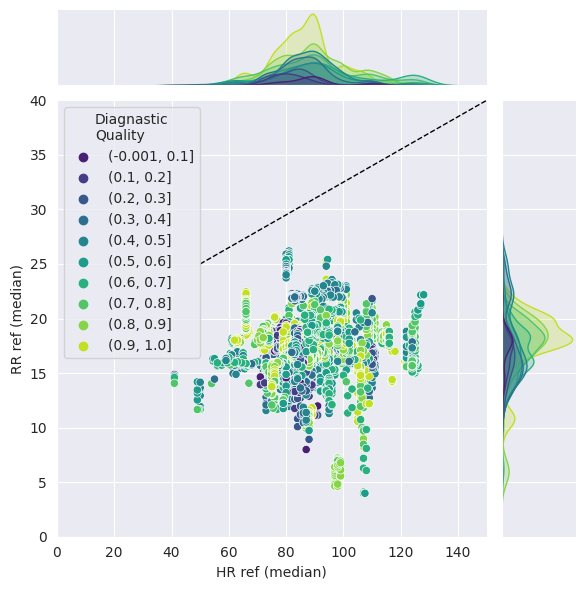

In [11]:
with IgnoreWarnings():
    plot = sns.jointplot(
        data=df,x='HR ref (median)', y='RR ref (median)', 
        hue='binned quality 10',
        palette='viridis'
        # palette=sns.cubehelix_palette(10)
        )
    plot.ax_joint.legend(title='Diagnastic\nQuality', loc='upper left')
    plot.ax_joint.set_xlim(0, 150)
    plot.ax_joint.set_ylim(0, 40)
    plot.ax_joint.plot([50,150], [25,40], 'k--', linewidth = 1)

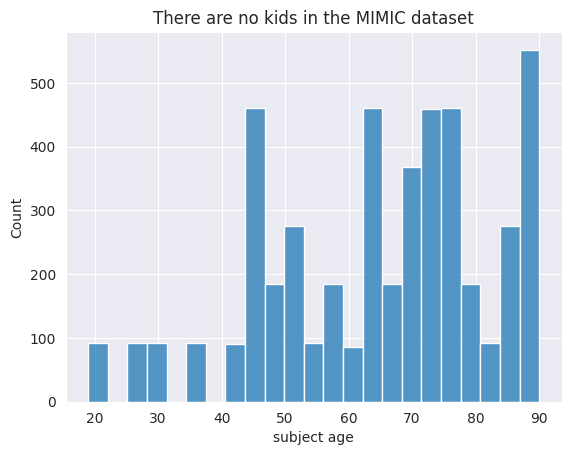

In [30]:
with IgnoreWarnings():
    plot = sns.histplot(
        x=df['subject age'].dropna().replace(to_replace='90+', value=90).astype('int')
        )
    plt.title('There are no kids in the MIMIC dataset')